In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_path = '../data/serenelli2017'
seis_file = 's17_table3.txt'
fund_sdss_file = 's17_table4.txt'
fund_aspcap_file = 's17_table5.txt'

In [7]:
seis_path = os.path.join(data_path, seis_file)
fund_sdss_path = os.path.join(data_path, fund_sdss_file)
fund_aspcap_path = os.path.join(data_path, fund_aspcap_file)

In [8]:
def peak_file(path):
    '''Peak file data line by line. Enter 'q' to quit.
    '''
    with open(path, 'r') as file:
        stream = file.read()
        lines = stream.splitlines()
        for i, line in enumerate(lines):
            print(f'{i}\t{line}', end='\t')
            if input() == 'q':
                break  

In [9]:
peak_file(seis_path) 

0	Title: The First APOKASC Catalog of Kepler Dwarf and Subgiant Stars	
1	Authors: Aldo Serenelli, Jennifer Johnson, Daniel Huber, Marc Pinsonneault,	
2		 Warrick H. Ball, Jamie Tayar, Victor Silva Aguirre, Sarbani Basu,	
3		 Nicholas Troup, Saskia Hekker, Thomas Kallinger, Dennis Stello,	
4		 Guy R. Davies, Mikkel N. Lund, Savita Mathur, Benoit Mosser,	
5		 Keivan G. Stassun, William J. Chaplin, Yvonne Elsworth,	
6		 Rafael A. Garcia, Rasmus Handberg, Jon Holtzman2, Fred Hearty,	
7		 D. A. Garcia-Hernandez, Patrick Gaulme, and Olga Zamora	
8	Table: Seismic properties of the APOKASC dwarfs sample	
9	============================================================================	
10	Byte-by-byte description	
11	----------------------------------------------------------------------------	
12	   Bytes  Format  Units  Label      Explanation	
13	----------------------------------------------------------------------------	
14	  1- 10    A10    ----   KIC        KIC identification number	
15	 12-

In [10]:
cols = ['KIC', 'numax', 'enumax', 'Dnu', 'eDnu', 'Length', 'HBR']
seis = pd.read_csv(seis_path, sep='\s+', names=cols, skiprows=22)
seis.head()

,KIC,numax,enumax,Dnu,eDnu,Length,HBR
0,1435467,1382.311,19.038,70.558,0.087,938.1,1.662
1,2010607,674.919,146.523,42.479,2.185,28.9,1.547
2,2309595,643.208,11.226,39.029,0.721,28.9,1.767
3,2450729,1053.105,114.904,61.910,2.539,28.9,1.470
4,2837475,1629.761,18.396,75.720,0.129,1029.4,1.767


In [11]:
peak_file(fund_sdss_path)

0	Title: The First APOKASC Catalog of Kepler Dwarf and Subgiant Stars	
1	Authors: Aldo Serenelli, Jennifer Johnson, Daniel Huber, Marc Pinsonneault,	
2		 Warrick H. Ball, Jamie Tayar, Victor Silva Aguirre, Sarbani Basu,	
3		 Nicholas Troup, Saskia Hekker, Thomas Kallinger, Dennis Stello,	
4		 Guy R. Davies, Mikkel N. Lund, Savita Mathur, Benoit Mosser,	
5		 Keivan G. Stassun, William J. Chaplin, Yvonne Elsworth,	
6		 Rafael A. Garcia, Rasmus Handberg, Jon Holtzman2, Fred Hearty,	
7		 D. A. Garcia-Hernandez, Patrick Gaulme, and Olga Zamora	
8	Table: Stellar fundamental parameters based on the SDSS Teff scale	
9	============================================================================	
10	Byte-by-byte description	
11	----------------------------------------------------------------------------	
12	   Bytes  Format   Units    Label      Explanation	
13	----------------------------------------------------------------------------	
14	  1- 10    A10    ----      KIC        KIC identificati

In [12]:
df_cols = pd.read_csv(fund_sdss_path, sep=' \s+', names=['col'], skiprows=14, usecols=[3], nrows=39-14)
cols = df_cols['col'].to_numpy()
cols[:5]

/Users/ajl573/.virtualenvs/base/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


array(['KIC', 'Teff', 'eTeff', '[M/H]', 'e[M/H]'], dtype=object)

In [13]:
fund_sdss = pd.read_csv(fund_sdss_path, sep='\s+', names=cols, skiprows=42, na_values='-99.000')
fund_sdss.head()

,KIC,Teff,eTeff,[M/H],e[M/H],Radius,+eRad,-eRad,syRad,Mass,...,-elogg,sylogg,rho,+erho,-erho,syrho,Age,+eAge,-eAge,syAge
0,1435467,6433.0,86.0,-0.028,0.099,1.693,0.015,-0.016,0.010,1.344,...,-0.006,0.002,0.27770,0.002376,-0.002391,0.001505,2.605,0.302,-0.293,0.215
1,2010607,6361.0,71.0,-0.070,0.100,2.410,0.100,-0.090,0.035,1.402,...,-0.027,0.003,0.09973,0.009867,-0.009399,0.001393,2.755,0.296,-0.301,0.184
2,2309595,5238.0,65.0,-0.095,0.101,2.423,0.076,-0.073,0.022,1.167,...,-0.008,0.002,0.08183,0.002543,-0.002494,0.000710,5.460,1.351,-1.023,0.422
3,2450729,6029.0,59.0,-0.212,0.100,1.758,0.059,-0.056,0.023,1.112,...,-0.021,0.006,0.20430,0.015940,-0.014980,0.002889,6.034,0.804,-0.718,0.550
4,2837475,6688.0,57.0,-0.015,0.100,1.710,0.022,-0.043,0.039,1.665,...,-0.011,0.006,0.33190,0.002563,-0.002835,0.006216,1.131,0.197,-0.181,0.221


In [14]:
peak_file(fund_aspcap_path)

0	Title: The First APOKASC Catalog of Kepler Dwarf and Subgiant Stars	
1	Authors: Aldo Serenelli, Jennifer Johnson, Daniel Huber, Marc Pinsonneault,	
2		 Warrick H. Ball, Jamie Tayar, Victor Silva Aguirre, Sarbani Basu,	
3		 Nicholas Troup, Saskia Hekker, Thomas Kallinger, Dennis Stello,	
4		 Guy R. Davies, Mikkel N. Lund, Savita Mathur, Benoit Mosser,	
5		 Keivan G. Stassun, William J. Chaplin, Yvonne Elsworth,	
6		 Rafael A. Garcia, Rasmus Handberg, Jon Holtzman2, Fred Hearty,	
7		 D. A. Garcia-Hernandez, Patrick Gaulme, and Olga Zamora	
8	Table: Stellar fundamental parameters based on the ASPCAP Teff scale	
9	============================================================================	
10	Byte-by-byte description	
11	----------------------------------------------------------------------------	
12	   Bytes  Format   Units    Label      Explanation	
13	----------------------------------------------------------------------------	
14	  1- 10    A10    ----      KIC        KIC identifica

In [15]:
df_cols = pd.read_csv(fund_aspcap_path, sep=' \s+', names=['col'], skiprows=14, usecols=[3], nrows=39-14)
cols = df_cols['col'].to_numpy()
cols[:5]

/Users/ajl573/.virtualenvs/base/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


array(['KIC', 'Teff', 'eTeff', '[M/H]', 'e[M/H]'], dtype=object)

In [16]:
fund_aspcap = pd.read_csv(fund_aspcap_path, sep='\s+', names=cols, skiprows=42, na_values='-99.000')
fund_aspcap.head()

,KIC,Teff,eTeff,[M/H],e[M/H],Radius,+eRad,-eRad,syRad,Mass,...,-elogg,sylogg,rho,+erho,-erho,syrho,Age,+eAge,-eAge,syAge
0,1435467,6096.7,69.276,-0.028,0.099,1.676,0.012,-0.011,0.013,1.277,...,-0.005,0.004,0.27110,0.001138,-0.001015,0.001526,3.746,0.349,-0.324,0.496
1,2010607,6013.5,69.276,-0.070,0.100,2.390,0.104,-0.095,0.028,1.325,...,-0.027,0.006,0.09667,0.009696,-0.009474,0.001512,3.544,0.396,-0.390,0.333
2,2309595,5000.2,69.276,-0.095,0.101,2.300,0.080,-0.073,0.063,1.022,...,-0.008,0.007,0.08390,0.002592,-0.002614,0.001254,9.537,2.667,-2.196,2.517
3,2450729,5840.4,69.276,-0.212,0.100,1.725,0.060,-0.056,0.028,1.047,...,-0.021,0.007,0.20350,0.015640,-0.015730,0.002757,7.724,1.051,-0.953,1.221
4,2837475,6335.4,69.276,-0.015,0.100,1.726,0.065,-0.014,0.067,1.672,...,-0.007,0.020,0.32450,0.002867,-0.002731,0.003638,1.804,0.313,-0.285,0.529


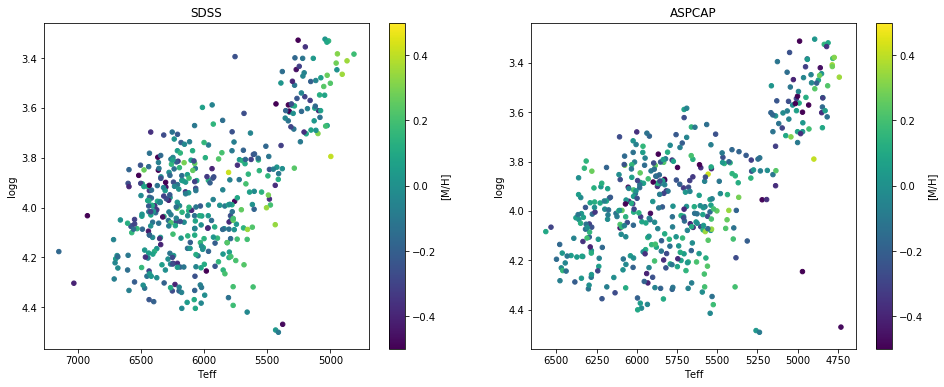

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fund_sdss.plot(ax=ax[0], kind='scatter', x='Teff', y='logg',
               # xerr='eTeff', yerr='sylogg',
               c='[M/H]', colormap='viridis', vmin=-0.5, vmax=0.5)
fund_aspcap.plot(ax=ax[1], kind='scatter', x='Teff', y='logg',
                 # xerr='eTeff', yerr='sylogg',
                 c='[M/H]', colormap='viridis', vmin=-0.5, vmax=0.5)

ax[0].set_title('SDSS')
ax[1].set_title('ASPCAP')

for a in ax:
    a.invert_xaxis()
    a.invert_yaxis()

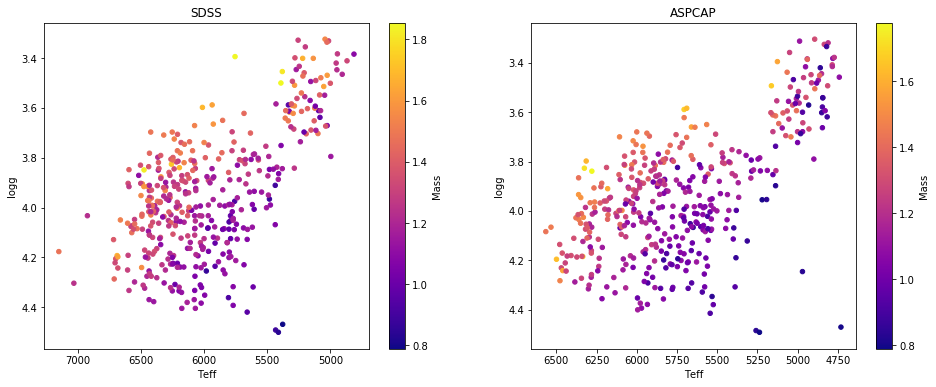

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fund_sdss.plot(ax=ax[0], kind='scatter', x='Teff', y='logg',
               # xerr='eTeff', yerr='sylogg',
               c='Mass', colormap='plasma')
fund_aspcap.plot(ax=ax[1], kind='scatter', x='Teff', y='logg',
                 # xerr='eTeff', yerr='sylogg',
                 c='Mass', colormap='plasma')

ax[0].set_title('SDSS')
ax[1].set_title('ASPCAP')

for a in ax:
    a.invert_xaxis()
    a.invert_yaxis()

## Save

Save each table as csv for easy loading.

In [19]:
prefix = 's17'

seis.to_csv(os.path.join(data_path, f'{prefix}_seis.csv'), index=False)
fund_aspcap.to_csv(os.path.join(data_path, f'{prefix}_ASPC.csv'), index=False)
fund_sdss.to_csv(os.path.join(data_path, f'{prefix}_SDSS.csv'), index=False)